# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | swakopmund
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | luchegorsk
Processing Record 6 of Set 1 | petropavlovsk-kamchatsky
Processing Record 7 of Set 1 | jashpurnagar
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | buarcos
Processing Record 11 of Set 1 | fortuna
Processing Record 12 of Set 1 | coquimbo
Processing Record 13 of Set 1 | belfast
Processing Record 14 of Set 1 | semirom
Processing Record 15 of Set 1 | west island
Processing Record 16 of Set 1 | ugoofaaru
Processing Record 17 of Set 1 | ouesso
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | lucas
Processing Record 20 of Set 1 | gisborne
Processing Record 21 of Set 1 | thompson
Processing Record 22 of Set 1 | blackmans bay
Processin

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,18.80,100,100,1.54,US,1721795062
1,albany,42.6001,-73.9662,20.88,93,55,1.16,US,1721795159
2,swakopmund,-22.6833,14.5333,9.99,88,33,0.45,NA,1721795159
3,ushuaia,-54.8000,-68.3000,1.81,80,100,9.77,AR,1721795127
4,luchegorsk,46.4764,134.2569,25.85,63,46,3.14,RU,1721795159


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,18.80,100,100,1.54,US,1721795062
1,albany,42.6001,-73.9662,20.88,93,55,1.16,US,1721795159
2,swakopmund,-22.6833,14.5333,9.99,88,33,0.45,NaN,1721795159
3,ushuaia,-54.8000,-68.3000,1.81,80,100,9.77,AR,1721795127
4,luchegorsk,46.4764,134.2569,25.85,63,46,3.14,RU,1721795159


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

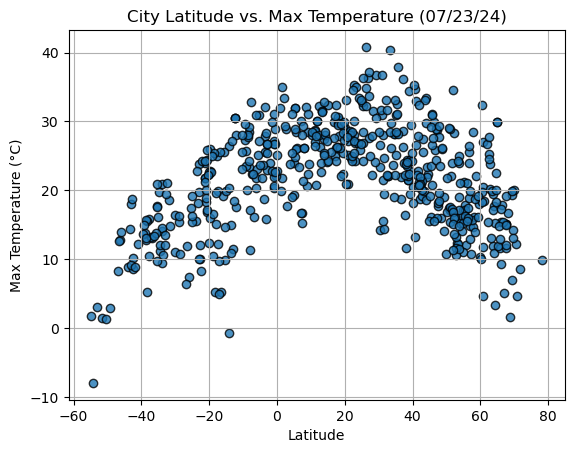

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], edgecolors="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (°C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

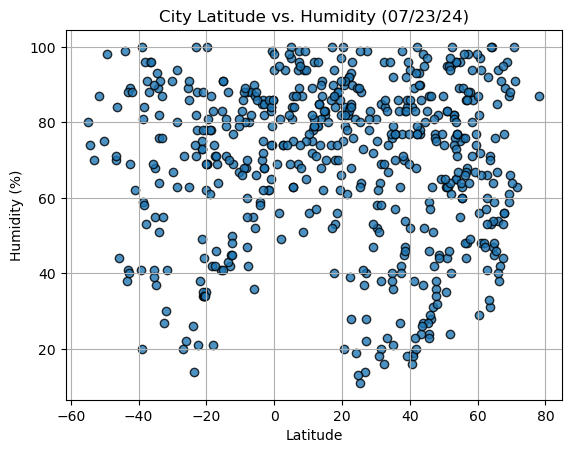

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

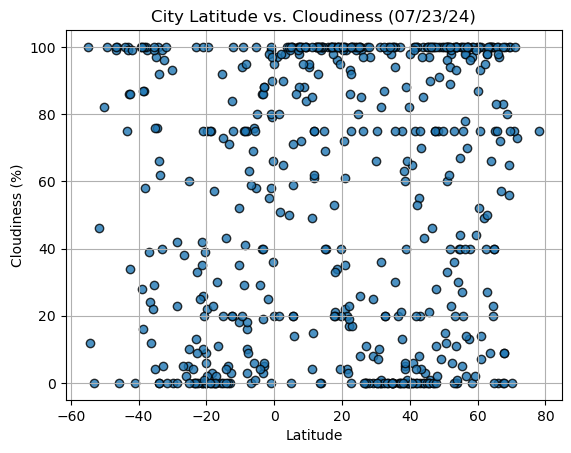

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor='black', linewidth=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%x')})")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

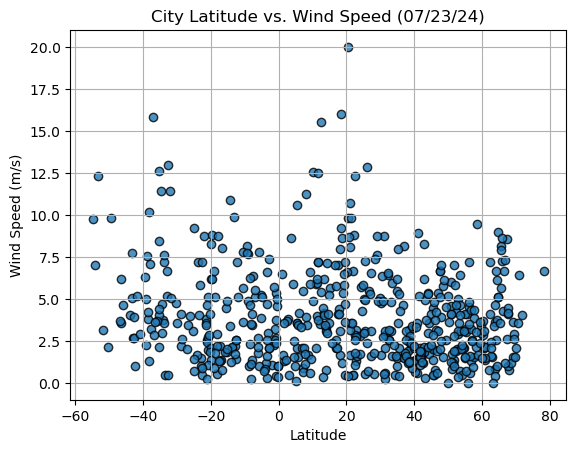

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor='black', linewidth=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%x')})")
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def linear_regression_function(x_values,y_values):
    slope, intercept, r_value, p_value, std_err = linregress(x_values,y_values)
    print(f'The r-value is: {r_value}')
    plt.plot(x_values, slope*x_values + intercept, color='red')
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    x_range = max(x_values) - min(x_values)
    y_range = max(y_values) - min(y_values)
    x_pos = min(x_values) + 0.3 * x_range  
    y_pos = min(y_values) + 0.2 * y_range
    plt.annotate(equation,(x_pos, y_pos), fontsize = 15, color ='red')

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,18.80,100,100,1.54,US,1721795062
1,albany,42.6001,-73.9662,20.88,93,55,1.16,US,1721795159
4,luchegorsk,46.4764,134.2569,25.85,63,46,3.14,RU,1721795159
5,petropavlovsk-kamchatsky,53.0452,158.6483,12.33,82,75,5.00,RU,1721795160
6,jashpurnagar,22.9000,84.1500,24.23,90,100,3.18,IN,1721795160


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,swakopmund,-22.6833,14.5333,9.99,88,33,0.45,NaN,1721795159
3,ushuaia,-54.8000,-68.3000,1.81,80,100,9.77,AR,1721795127
7,port-aux-francais,-49.3500,70.2167,2.97,98,100,9.82,TF,1721795160
8,grytviken,-54.2811,-36.5092,-7.98,74,12,7.03,GS,1721795160
11,coquimbo,-29.9533,-71.3436,11.10,67,0,3.60,CL,1721795161


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.586412826508505


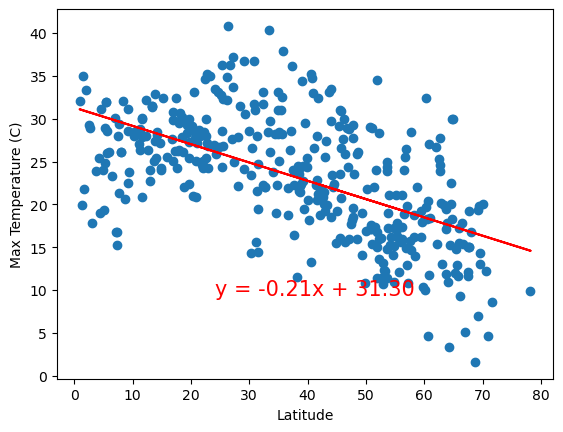

In [19]:
# Linear regression on Northern Hemisphere
linear_regression_function(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.savefig("output_data/Fig5.png")
plt.show()


The r-value is: 0.690640460825003


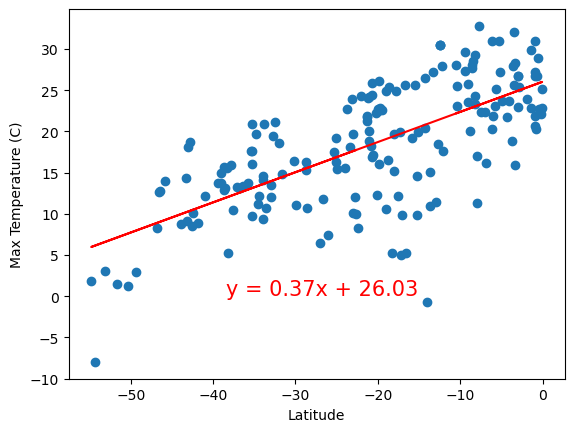

In [20]:
# Linear regression on Southern Hemisphere
linear_regression_function(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.savefig("output_data/Fig6.png")
plt.show()

**Discussion about the linear relationship:**
We can observe that as the latitude increases the temperature decreases. While when you are closer to the equator the temperature is warmer.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.15672026220796526


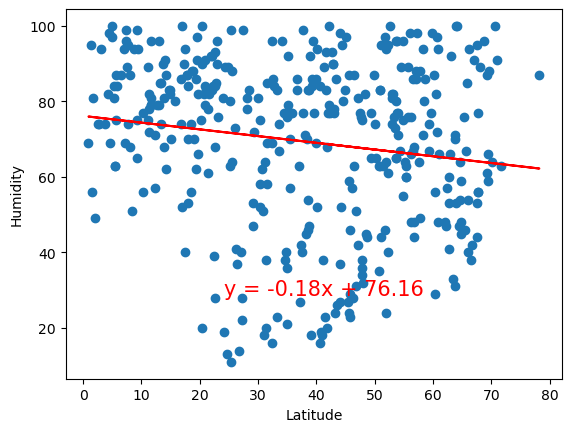

In [21]:
# Northern Hemisphere
linear_regression_function(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("output_data/Fig7.png")
plt.show()

The r-value is: 0.06418172603398822


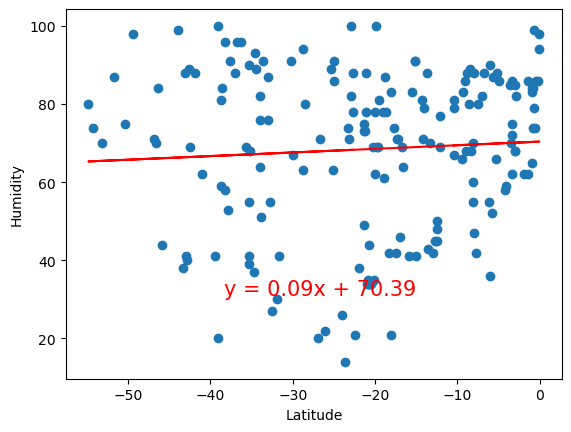

In [22]:
# Southern Hemisphere
linear_regression_function(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("output_data/Fig8.png")
plt.show()

**Discussion about the linear relationship:** The graphs shows a weak relationship between latitude and humidity. This tell us the humidity is not related with the latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.08416482920441828


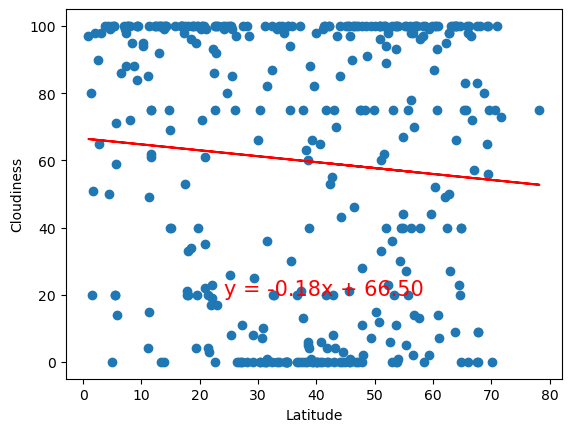

In [23]:
# Northern Hemisphere
linear_regression_function(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("output_data/Fig9.png")
plt.show()

The r-value is: -0.12993666971865875


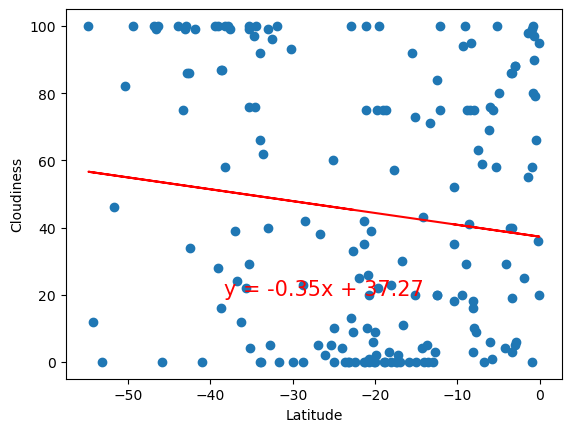

In [24]:
# Southern Hemisphere
linear_regression_function(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("output_data/Fig10.png")
plt.show()

**Discussion about the linear relationship:** The graphs shows a weak relationship between latitude and Cloudiness. This tell us the Cloudiness is not related with the latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.15304109991141704


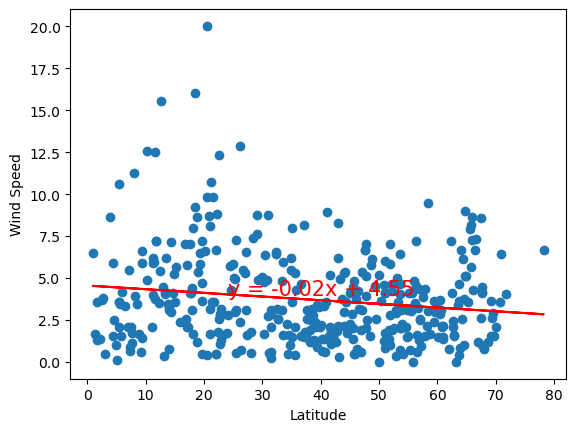

In [25]:
# Northern Hemisphere
linear_regression_function(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig("output_data/Fig11.png")
plt.show()

The r-value is: -0.27932909819156676


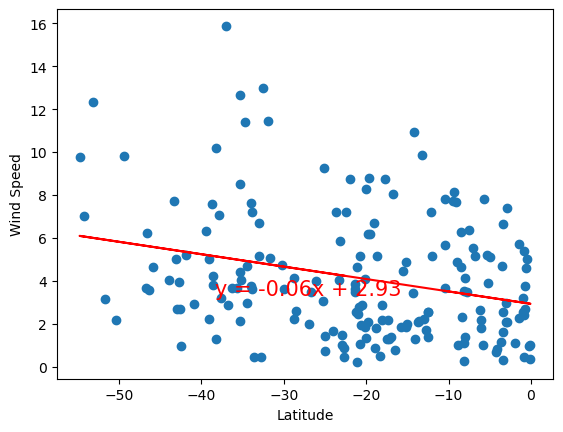

In [26]:
# Southern Hemisphere
linear_regression_function(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig("output_data/Fig8.png")
plt.show()

**Discussion about the linear relationship:** The graphs shows a weak relationship between latitude and wind speed. This tell us the Wind speed is not too related with the latitude.